## cv(1)-mnist_mlp
- author: xiaozhi
- date: 2020-10-02

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
# %matplotlib.inline()
print("导入成功.....")

Using TensorFlow backend.


导入成功.....


### 1.图像数据处理

In [2]:
# 加载数据
data = np.load("mnist.npz")
print(">>> 查看数据文件：", data.files)
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']
print(x_train.shape, x_test.shape)
print("class numbers: ", set(y_train))
x_train[:2]


>>> 查看数据文件： ['x_test', 'x_train', 'y_train', 'y_test']
(60000, 28, 28) (10000, 28, 28)
class numbers:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [3]:
# 特征数据处理
# (1)由于使用mlp模型，需将三维数据转换成二维
max_features = 28*28
x_train = x_train.reshape(60000, max_features)
x_test = x_test.reshape(10000, max_features)
# (2)uint8 ——> float32
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
# (3)标准化数据
x_train = x_train/255
x_test = x_test/255
print(x_train.shape, x_test.shape)
x_train[:2]


(60000, 784) (10000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 2.参数配置

In [4]:
batch_size = 128
classes_num = 10
epochs = 10


### 3.标签数据处理

In [5]:
y_train = keras.utils.to_categorical(y_train, classes_num)
y_test = keras.utils.to_categorical(y_test, classes_num)
print(y_train.shape)

(60000, 10)


### 4.构建MLP网络

In [6]:
model = Sequential()
model.add(Dense(units=512, 
                activation="relu", 
                input_shape=(max_features,))
         )
model.add(Dropout(0.2))
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.2))
# model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=classes_num, activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### 5.编译网络模型

In [7]:
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(lr=0.001),   # 学习率设置为(默认) 0.001
              metrics=['accuracy']
             )


### 6.训练网络

In [8]:
history = model.fit(x_train,
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          # validation_split=None,  # 0.1
          validation_data=(x_test, y_test)
         )


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 43s 713us/step - loss: 0.2748 - accuracy: 0.9164 - val_loss: 0.1128 - val_accuracy: 0.9648
Epoch 2/10
60000/60000 [==============================] - 45s 746us/step - loss: 0.1100 - accuracy: 0.9662 - val_loss: 0.0801 - val_accuracy: 0.9772
Epoch 3/10
60000/60000 [==============================] - 43s 719us/step - loss: 0.0821 - accuracy: 0.9752 - val_loss: 0.0840 - val_accuracy: 0.9762
Epoch 4/10
60000/60000 [==============================] - 43s 719us/step - loss: 0.0644 - accuracy: 0.9808 - val_loss: 0.0873 - val_accuracy: 0.9759
Epoch 5/10
60000/60000 [==============================] - 44s 739us/step - loss: 0.0535 - accuracy: 0.9843 - val_loss: 0.0785 - val_accuracy: 0.9794
Epoch 6/10
60000/60000 [==============================] - 45s 749us/step - loss: 0.0484 - accuracy: 0.9859 - val_loss: 0.0820 - val_accuracy: 0.9803
Epoch 7/10
60000/60000 [==============================] 

### 7.历史可视化

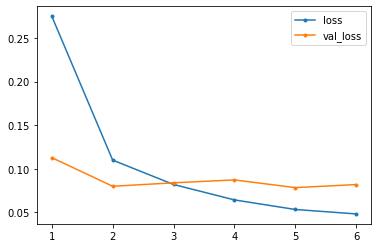

In [9]:
x = range(1, len(history.epoch)+1)
plt.plot(x, history.history['loss'], label="loss", marker=".")
plt.plot(x, history.history['val_loss'], label="val_loss", marker=".")
plt.legend()

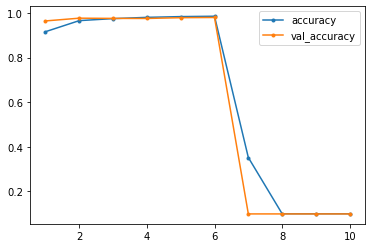

In [10]:
plt.plot(x, history.history['accuracy'], label="accuracy", marker=".")
plt.plot(x, history.history['val_accuracy'], label="val_accuracy", marker=".")
plt.legend()

### 8.性能评估

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("test loss: {}".format(score[0]))
print("test accuracy: {}".format(score[1]))

test loss: nan
test accuracy: 0.09799999743700027


### 9.问题解决

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 44s 735us/step - loss: 0.6814 - accuracy: 0.8216 - val_loss: 0.2831 - val_accuracy: 0.9229
Epoch 2/10
60000/60000 [==============================] - 42s 693us/step - loss: 0.2982 - accuracy: 0.9130 - val_loss: 0.2001 - val_accuracy: 0.9418
Epoch 3/10
60000/60000 [==============================] - 41s 683us/step - loss: 0.2245 - accuracy: 0.9349 - val_loss: 0.1607 - val_accuracy: 0.9510
Epoch 4/10
60000/60000 [==============================] - 43s 720us/step - loss: 0.1803 - accuracy: 0.9470 - val_loss: 0.1395 - val_accuracy: 0.9571
Epoch 5/10
60000/60000 [==============================] - 41s 680us/step - loss: 0.1532 - accuracy: 0.9556 - val_loss: 0.1186 - val_accuracy: 0.9641
Epoch 6/10
60000/60000 [==============================] - 41s 682us/step - loss: 0.1306 - accuracy: 0.9621 - val_loss: 0.1043 - val_accuracy: 0.9671
Epoch 7/10
60000/60000 [==============================] 

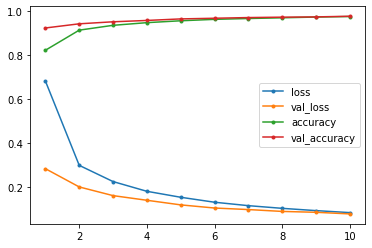

In [12]:
del model
model = Sequential()
model.add(Dense(units=512, 
                activation="relu", 
                input_shape=(max_features,))
         )
model.add(Dropout(0.2))
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.2))
# model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=classes_num, activation="sigmoid"))
# model.summary()

# ---------------------------------------------------------
# 面对loss出现nan，准确率急速下降的问题进行优化
# 考虑原因是学习率过大，因此学习率由0.001降到0.0001
# ---------------------------------------------------------
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(lr=0.0001),   # 学习率设置为 0.0001
              metrics=['accuracy']
             )

history = model.fit(x_train,
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          # validation_split=None,  # 0.1
          validation_data=(x_test, y_test)
         )

x = range(1, len(history.epoch)+1)
plt.plot(x, history.history['loss'], label="loss", marker=".")
plt.plot(x, history.history['val_loss'], label="val_loss", marker=".")
plt.legend()

plt.plot(x, history.history['accuracy'], label="accuracy", marker=".")
plt.plot(x, history.history['val_accuracy'], label="val_accuracy", marker=".")
plt.legend()

score = model.evaluate(x_test, y_test, verbose=0)
print("test loss: {}".format(score[0]))
print("test accuracy: {}".format(score[1]))


### 10.总结
- 针对深度学习模型，参数设置和调整至关重要，参数设置不当或者相应的函数选取不当，都有可能出现严重的性能问题；
- 相应损失函数、优化器、激活函数的设置也是根据具体问题具体分析，一般而言，损失函数通常选取交叉熵，优化器有adam、rmsprop，激活函数通常选取sigmoid,softmax,relu；
- 在本案例中，训练过程中，损失函数出现nan情况，并且训练准确率也出现急速下降的情况，一般造成这种原因因素较多，比如：
    1. **学习率过大容易导致模型震荡，在本案例将优化器中的学习率由0.001调整为0.0001，模型由差变好；**
    2. batch太大；
    3. 数据本身很脏；
    4. .....
- 深度学习弱化了手动处理特征的过程，所以深度学习更加侧重于神经网络的结构参数、函数选择、参数以及超参数配置就显得尤为重要；
- 机器学习的模型函数通常就一种，不像神经网络可以在不同神经层添加不同的激活函数，这也就使得机器学习在保证模型没问题的情况下，更加侧重于对数据进行特征工程，从而争取再提高准确率。